## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35209 files belonging to 24 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1116 files belonging to 24 classes.


# To avoid Overshooting Loss function
Choose small learning rate default 0.001 here we have taken 0.0001
There may be chance of underfitting so increase number of neuron
Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [10]:
cnn = tf.keras.models.Sequential()

### Building Convolution layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\ganes\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [25]:
cnn.add(tf.keras.layers.Flatten())

In [27]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [31]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=24,activation='softmax'))

## Compiling and Training Phase

In [34]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          36,024 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,821,748 (29.84 MB)

 Trainable params: 7,821,748 (29.84 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [39]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 446s 395ms/step - accuracy: 0.5738 - loss: 1.4178 - val_accuracy: 0.8271 - val_loss: 0.4907
Epoch 2/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 409s 371ms/step - accuracy: 0.8707 - loss: 0.3658 - val_accuracy: 0.8907 - val_loss: 0.3037
Epoch 3/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 354s 321ms/step - accuracy: 0.9153 - loss: 0.2299 - val_accuracy: 0.9176 - val_loss: 0.2312
Epoch 4/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 353s 320ms/step - accuracy: 0.9375 - loss: 0.1727 - val_accuracy: 0.9086 - val_loss: 0.2618
Epoch 5/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 354s 322ms/step - accuracy: 0.9519 - loss: 0.1367 - val_accuracy: 0.9615 - val_loss: 0.1278
Epoch 6/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 353s 321ms/step - accuracy: 0.9603 - loss: 0.1118 - val_accuracy: 0.9668 - val_loss: 0.0916
Epoch 7/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 353s 320ms/step - accuracy: 0.9674 - loss: 0.0896 - val_accuracy: 0.9686 - val_loss: 0.0920
Epoch 8/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 354s 321ms/step - ac

## Evaluating Model


In [41]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1101/1101 ━━━━━━━━━━━━━━━━━━━━ 155s 141ms/step - accuracy: 0.9805 - loss: 0.0638
Training accuracy: 0.982305645942688


In [43]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9732 - loss: 0.0746
Validation accuracy: 0.9668458700180054


## Saving Model

In [46]:
cnn.save('trained_food_model2.keras')

In [48]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7254111170768738,
  0.8844045400619507,
  0.920673668384552,
  0.9403277635574341,
  0.9534209966659546,
  0.9629639983177185,
  0.9681899547576904,
  0.9740691184997559,
  0.9797778725624084,
  0.9791246652603149],
 'loss': [0.8589985370635986,
  0.32454463839530945,
  0.21624810993671417,
  0.1658240556716919,
  0.12954272329807281,
  0.10426517575979233,
  0.08648046851158142,
  0.07854746282100677,
  0.05767536908388138,
  0.06419733166694641],
 'val_accuracy': [0.8270609378814697,
  0.8906810283660889,
  0.91756272315979,
  0.9086021780967712,
  0.9614695310592651,
  0.9668458700180054,
  0.968638002872467,
  0.9731183052062988,
  0.9793906807899475,
  0.9668458700180054],
 'val_loss': [0.49065807461738586,
  0.30369505286216736,
  0.2312127947807312,
  0.26180213689804077,
  0.12779158353805542,
  0.09161144495010376,
  0.09198911488056183,
  0.0647912248969078,
  0.05413885414600372,
  0.08482098579406738]}

In [50]:
#Recording History in json
import json
with open('training_hist2.json','w') as f:
  json.dump(training_history.history,f)

In [52]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

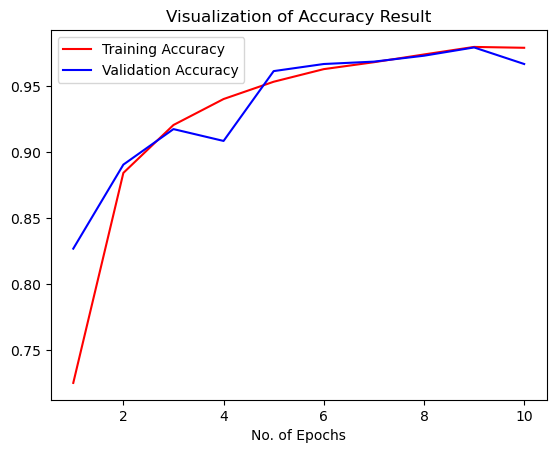

In [55]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [58]:
class_name = validation_set.class_names

In [60]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1116 files belonging to 24 classes.


In [62]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1116/1116 ━━━━━━━━━━━━━━━━━━━━ 49s 43ms/step


In [64]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [66]:
Y_true

<tf.Tensor: shape=(1116,), dtype=int64, numpy=array([ 0,  0,  0, ..., 23, 23, 23], dtype=int64)>

In [68]:
predicted_categories

<tf.Tensor: shape=(1116,), dtype=int64, numpy=array([ 0,  0,  0, ..., 23, 23, 23], dtype=int64)>

In [71]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [73]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                   precision    recall  f1-score   support

      fresh_Apple       1.00      1.00      1.00        36
     fresh_Banana       1.00      1.00      1.00        48
fresh_Bittergroud       1.00      1.00      1.00        48
   fresh_Capsicum       0.96      1.00      0.98        48
   fresh_Cucumber       0.89      0.85      0.87        48
      fresh_Guava       1.00      1.00      1.00        48
       fresh_Lime       1.00      1.00      1.00        48
       fresh_Okra       0.84      0.98      0.90        48
    fresh_Oranges       0.98      1.00      0.99        48
fresh_Pomegranate       0.98      1.00      0.99        48
     fresh_Potato       1.00      0.71      0.83        48
     fresh_Tomato       1.00      1.00      1.00        48
      rottenApple       1.00      1.00      1.00        48
     rottenBanana       1.00      0.98      0.99        48
rottenBittergroud       1.00      1.00      1.00        48
   rottenCapsicum       1.00      1.00      1.00       

## Confusion Matrix Visualization

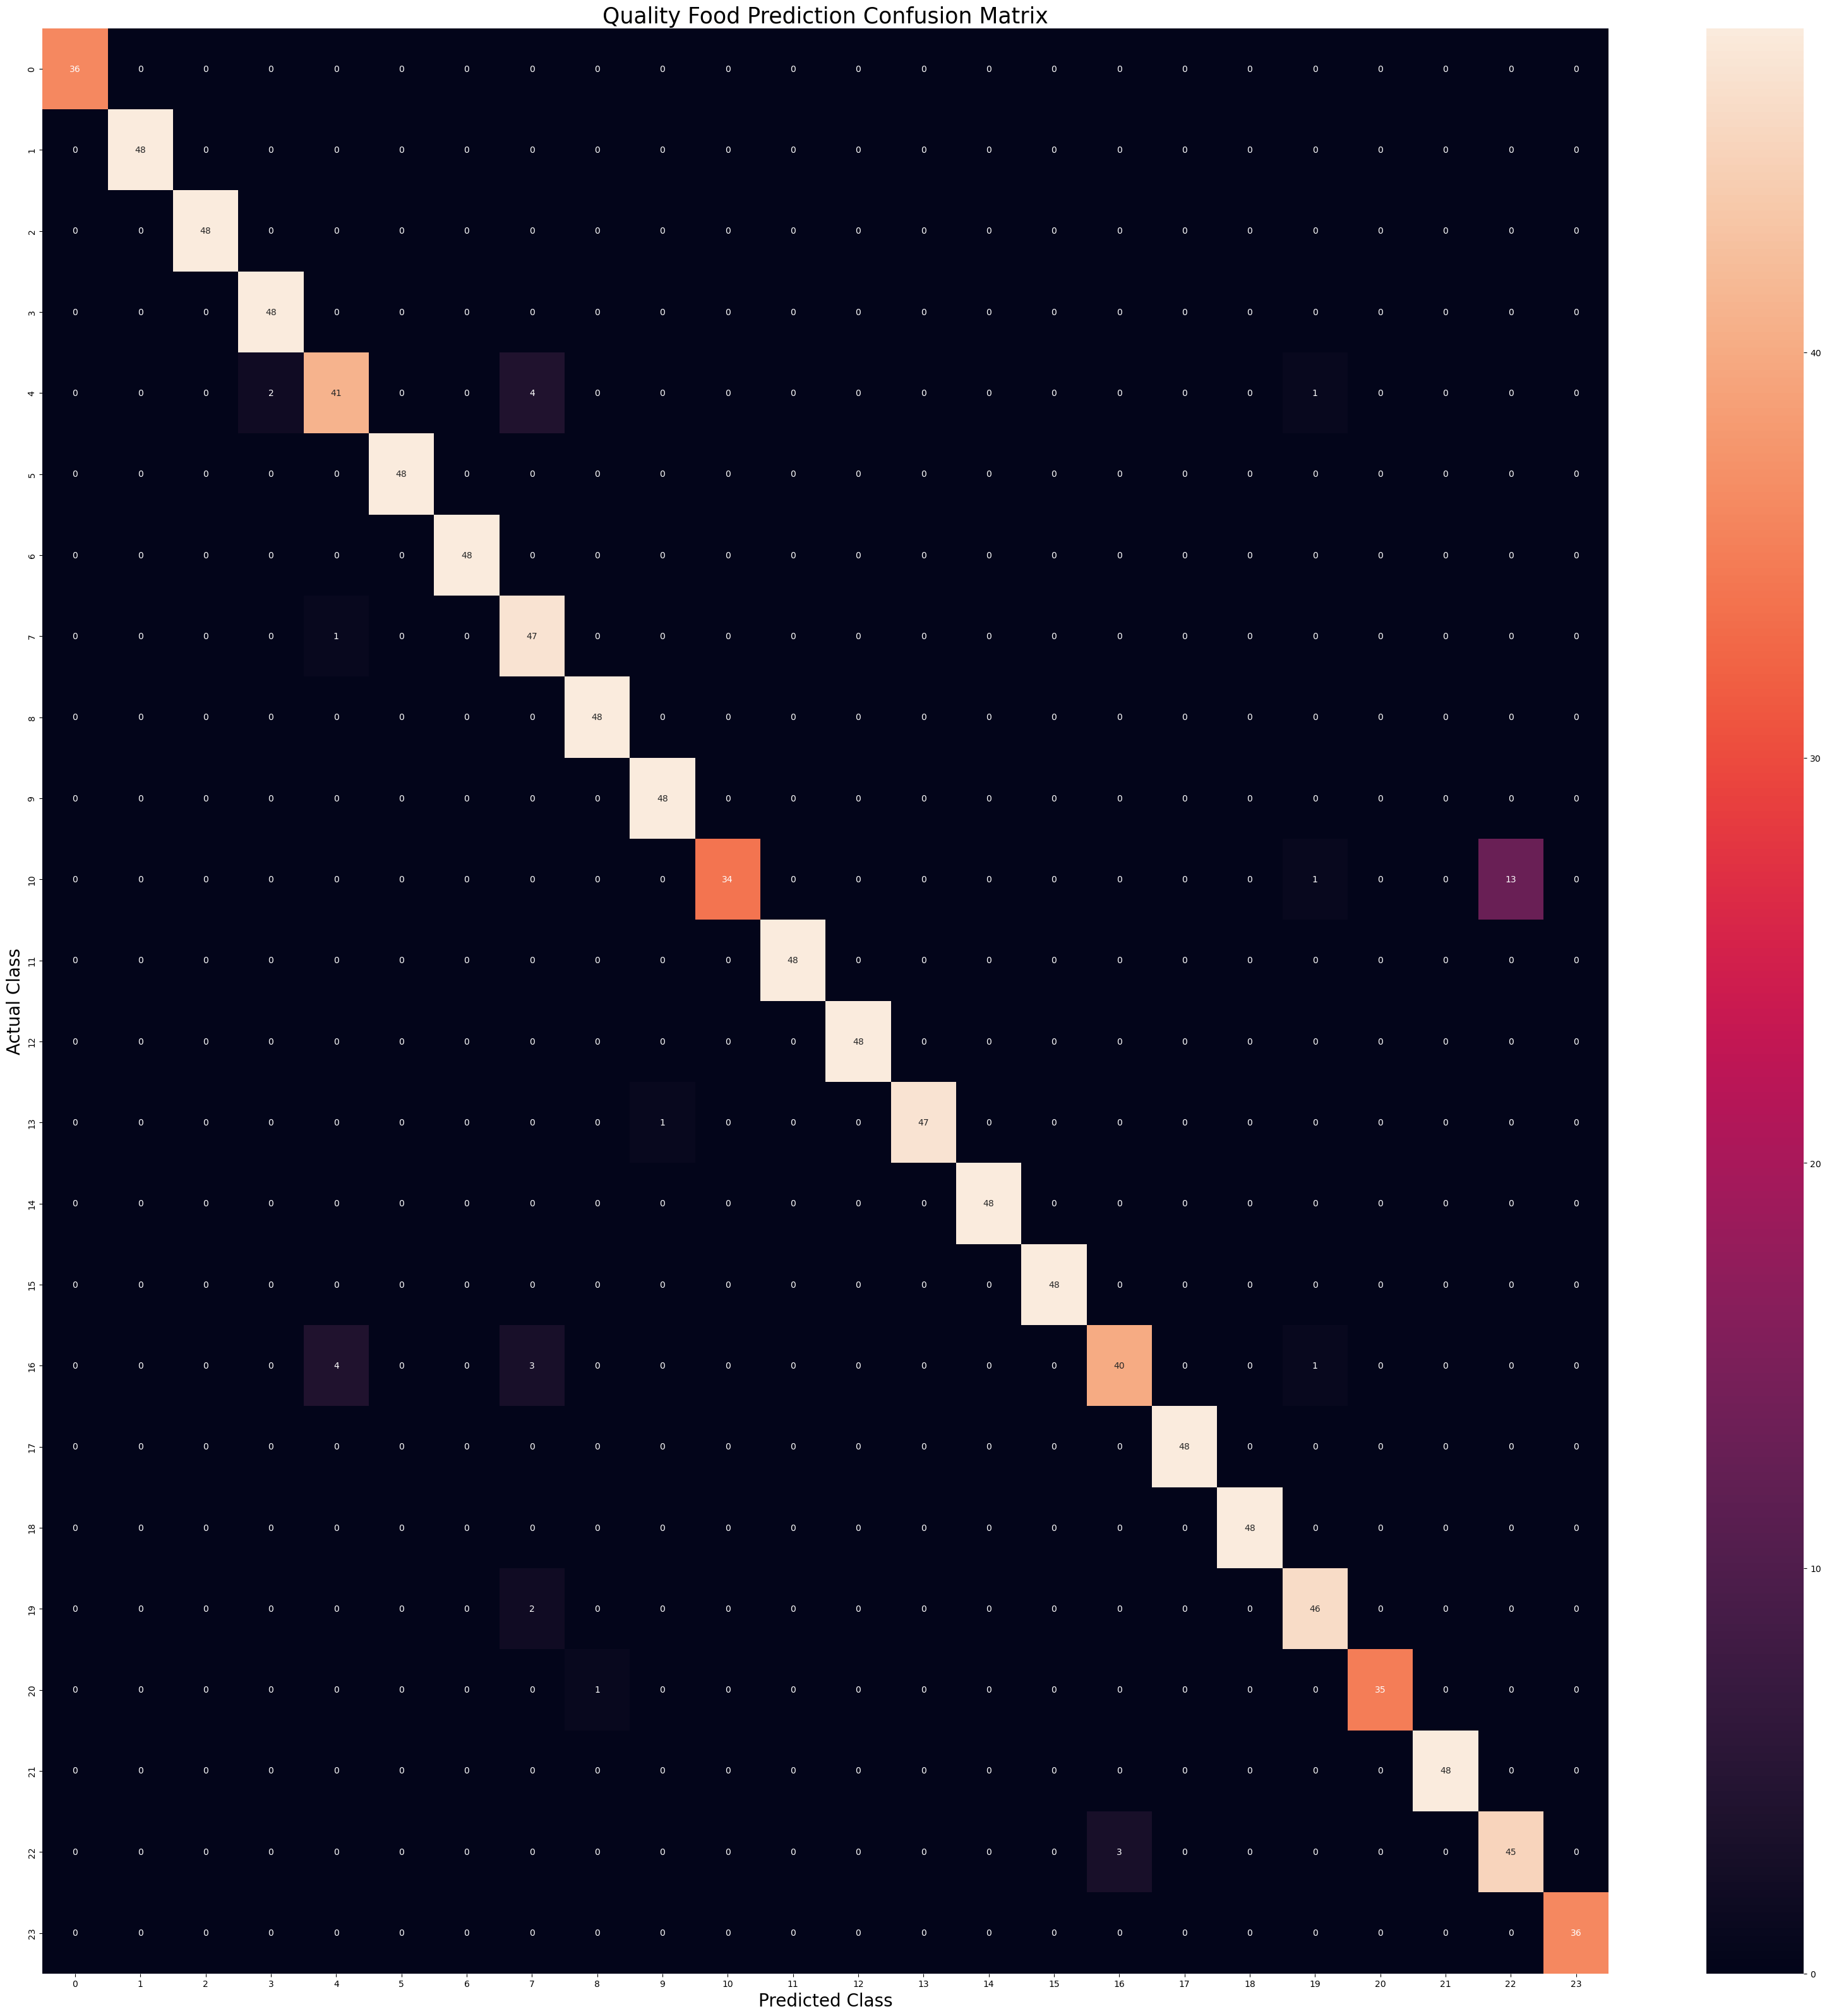

In [76]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Quality Food Prediction Confusion Matrix',fontsize = 25)
plt.show()